# *How Much Can You Expect to Earn After Graduation?*
Ashley Lee  
Digital Humanities 140  
Winter 2023

# <font color=#1261A0>**Introduction**</font>


The college application process can be a daunting yet exciting process. Throughout the process, applicants are researching schools to apply to and fields to major in. And once this is all finished, applicants must go through another process of deciding which school to commit to, which is not an easy decision to make. Throughout college as well, it is not uncommon for people to change majors, sometimes completely changing their career path or even transferring colleges. These changes are motivated by various reasons, some being salary, interest, or career opportunities.

As I am approaching the end of my senior year and about to graduate, this topic has been on my mind more frequently. I also find this to be a topic of discussion amongst most of my conversations. These are all factors that I considered when applying to college and am now considering while on the job hunt, so researching more about this can allow me to have more insight on my post-grad options and how much weight my college career has on my future.

This research will explore the various factors that affect salary after graduation. Some of these factors include college attended, major(s), and field(s) studied. This research will allow new graduates to have a better understanding of their post-grad future and how their salary can be affected by their college career and field of choice.

# <font color=#1261A0>**Methods**</font>


### About the Data
***Degrees that Pay Back***: This dataset shows the starting and mid-career median salaries of each undergraduate major. This data was and is based on survey data from Payscale, Inc. We will explore this dataset to observe the relationship between undergraduate major and salary.
https://www.kaggle.com/datasets/wsj/college-salaries?select=degrees-that-pay-back.csv

***Salaries by College Type***: This dataset classifies each school with a type (Ivy League, Engineering, Liberal Arts, etc.) and shows its respective median salary. This dataset can be used to explore the relationship between school types and salary.
https://www.kaggle.com/datasets/wsj/college-salaries?select=salaries-by-college-type.csv

***Salaries by Region***: This dataset classifies each school by a region (California, Midwestern, Northeastern, Southern, Western) and shows its respective median salary. This dataset can be used to explore the relationship between school region and salary.
https://www.kaggle.com/datasets/wsj/college-salaries?select=salaries-by-region.csv

### Data Cleaning and Processing
During this step, the data is cleaned and process for the proceeding analysis stage. The data was not easily usable and not in the right format to be used. For example, all the numbers needed to be converted to be of type numeric.

In [8]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

degrees = pd.read_csv('degrees-that-pay-back.csv')
salaries = pd.read_csv('salaries-by-college-type.csv')
region = pd.read_csv('salaries-by-region.csv')

# Convert columns to numeric and remove unnecessary symbols ($)
degrees['Starting Median Salary'] = degrees['Starting Median Salary'].str.replace(',', '').astype(float)
degrees['Mid-Career Median Salary'] = degrees['Mid-Career Median Salary'].str.replace(',', '').astype(float)
degrees['Mid-Career 10th Percentile Salary'] = degrees['Mid-Career 10th Percentile Salary'].str.replace(',', '').astype(float)
degrees['Mid-Career 25th Percentile Salary'] = degrees['Mid-Career 25th Percentile Salary'].str.replace(',', '').astype(float)
degrees['Mid-Career 75th Percentile Salary'] = degrees['Mid-Career 75th Percentile Salary'].str.replace(',', '').astype(float)
degrees['Mid-Career 90th Percentile Salary'] = degrees['Mid-Career 90th Percentile Salary'].str.replace(',', '').astype(float)

salaries['Starting Median Salary'] = salaries['Starting Median Salary'].str.replace(',', '').astype(float)
salaries['Mid-Career Median Salary'] = salaries['Mid-Career Median Salary'].str.replace(',', '').astype(float)
salaries['Mid-Career 10th Percentile Salary'] = salaries['Mid-Career 10th Percentile Salary'].str.replace(',', '').astype(float)
salaries['Mid-Career 25th Percentile Salary'] = salaries['Mid-Career 25th Percentile Salary'].str.replace(',', '').astype(float)
salaries['Mid-Career 75th Percentile Salary'] = salaries['Mid-Career 75th Percentile Salary'].str.replace(',', '').astype(float)
salaries['Mid-Career 90th Percentile Salary'] = salaries['Mid-Career 90th Percentile Salary'].str.replace(',', '').astype(float)

region['Starting Median Salary'] = region['Starting Median Salary'].str.replace(',', '').astype(float)
region['Mid-Career Median Salary'] = region['Mid-Career Median Salary'].str.replace(',', '').astype(float)
region['Mid-Career 10th Percentile Salary'] = region['Mid-Career 10th Percentile Salary'].str.replace(',', '').astype(float)
region['Mid-Career 25th Percentile Salary'] = region['Mid-Career 25th Percentile Salary'].str.replace(',', '').astype(float)
region['Mid-Career 75th Percentile Salary'] = region['Mid-Career 75th Percentile Salary'].str.replace(',', '').astype(float)
region['Mid-Career 90th Percentile Salary'] = region['Mid-Career 90th Percentile Salary'].str.replace(',', '').astype(float)

cols_to_convert = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 
                  'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']
degrees[cols_to_convert] = degrees[cols_to_convert].apply(pd.to_numeric)
salaries[cols_to_convert] = salaries[cols_to_convert].apply(pd.to_numeric)
region[cols_to_convert] = region[cols_to_convert].apply(pd.to_numeric)

After cleaning the data, we can preview the datasets that we will be working with. We also calculated a table of summary statistics.

### Dataset #1 - Degrees

In [11]:
degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [12]:
degrees.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


### Dataset #2 - Salaries

In [3]:
salaries.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [13]:
salaries.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


### Dataset #3 - Region

In [6]:
region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [14]:
region.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


## *Exploratory Data Analysis*

We begin by conducting exploratory data analysis to answer our research question. Specifically, in this process, we are interested in learning about general salary statistics and which majors and types of schools will lead to higher salaries.

*Please note that all datasets had information on median salary, so we are only exploring median salary from the Salaries dataset. We will further analyze both in the later parts of the project.*

In [83]:
# Overall starting median salary
salaries['Starting Median Salary'].mean()

46068.40148698885

From the plot below, we can see that the median starting salary is right-skewed, with most starting median salaries being around \\$40000 - \\$45,000. 

Text(0.5, 1.0, 'Starting Median Salary (by Degree)')

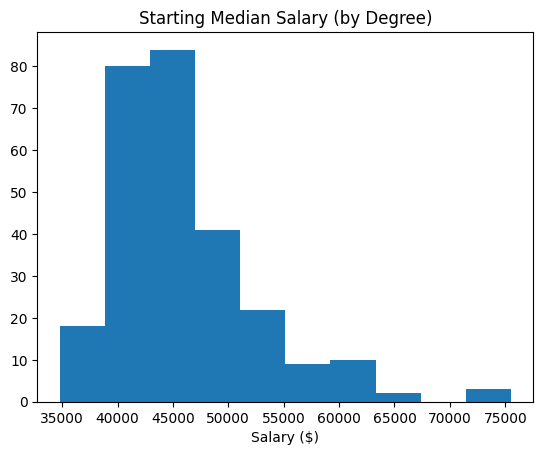

In [36]:
plt.hist(salaries['Starting Median Salary'])
plt.xlabel('Salary ($)')
plt.title('Starting Median Salary (by Degree)')

Now we can explore the mid-career median salary to see the shift from the starting median salary.

In [84]:
# Overall mid-career median salary
salaries['Mid-Career Median Salary'].mean()

83932.34200743494

Typically, the median salary shifts later in the career. From this Mid-Career Median Salary graph, we can see that the salary has shifted to be around \\$80,000, which is almost double what is shown in the Starting Median Salary graph (above). The mean has also increased by about \\$37,000.

Text(0.5, 1.0, 'Mid-Career Median Salary (by Degree)')

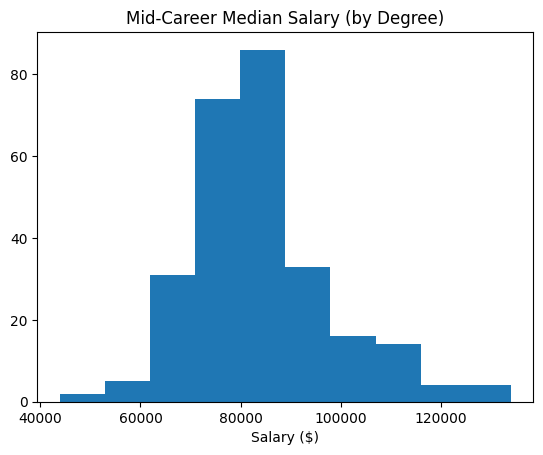

In [35]:
plt.hist(salaries['Mid-Career Median Salary'])
plt.xlabel('Salary ($)')
plt.title('Mid-Career Median Salary (by Degree)')

Additionally, we can explore the impact of a college's region on salary. According to the graph, schools in California and Northeastern have a higher starting median salary.

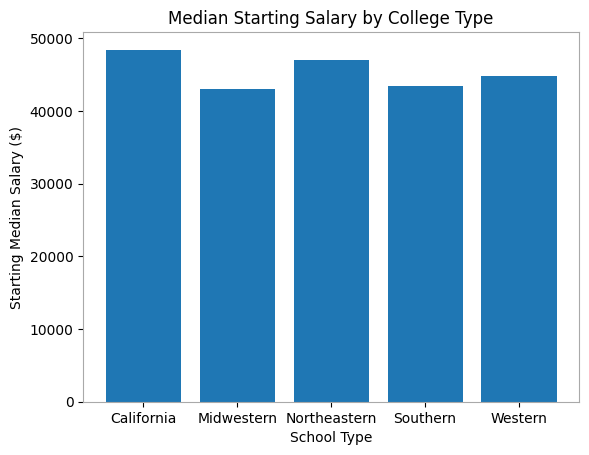

In [80]:
# Group the data by region type and calculate the median starting salary
grouped_region = region.groupby('Region')['Starting Median Salary'].median().reset_index()

# Create a bar plot
plt.bar(grouped_region['Region'], grouped_region['Starting Median Salary'])
plt.xlabel('School Type')
plt.ylabel('Starting Median Salary ($)')
plt.title('Median Starting Salary by College Type')

plt.show()

Lastly, as part of our exploratory data analysis, we explore the relationship between starting and mid-career median salaries by major. There is a linear relationship between these two variables; with a higher starting median salary, the mid-career median salary also usually ends up being higher.

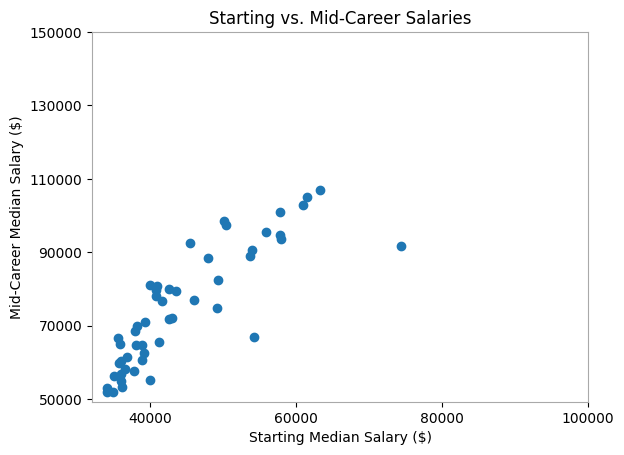

In [86]:
plt.scatter(degrees['Starting Median Salary'], degrees['Mid-Career Median Salary'])
plt.xlabel('Starting Median Salary ($)')
plt.ylabel('Mid-Career Median Salary ($)')
plt.title('Starting vs. Mid-Career Salaries')

# Set x-axis tick values
plt.xticks(range(40000, 120000, 20000))

# Set y-axis tick values
plt.yticks(range(50000, 160000, 20000))

plt.show()

## Analysis

After conducting introductory analysis, we have a better idea of our data and now we can use this information to dive deeper into our datasets to answer our research question.

To further explore the relationship between major studied and salary, we can identify the top ten earning majors according to their mid-career median salaries.

In [21]:
top_majors = degrees.sort_values(by='Mid-Career Median Salary', ascending=False).head(10)
print(top_majors['Undergraduate Major'])

8       Chemical Engineering
12      Computer Engineering
19    Electrical Engineering
1      Aerospace Engineering
17                 Economics
44                   Physics
13          Computer Science
30    Industrial Engineering
38    Mechanical Engineering
37                      Math
Name: Undergraduate Major, dtype: object


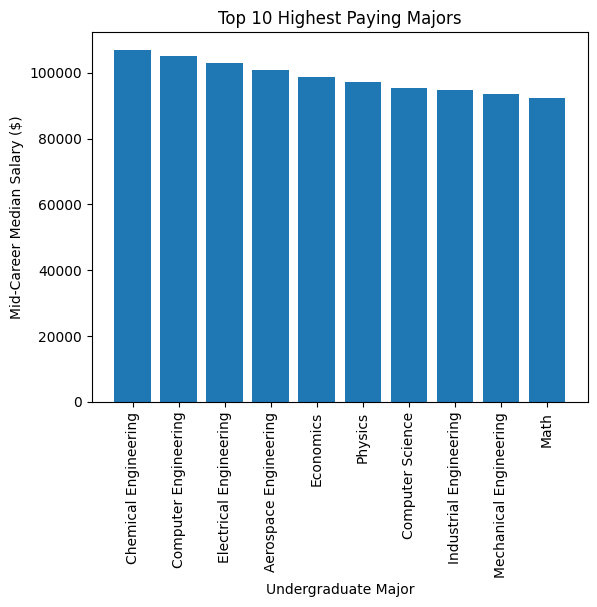

In [30]:
top_majors = degrees.sort_values(by='Mid-Career Median Salary', ascending=False).head(10)
plt.bar(top_majors['Undergraduate Major'], top_majors['Mid-Career Median Salary'])
plt.xticks(rotation=90)
plt.xlabel('Undergraduate Major')
plt.ylabel('Mid-Career Median Salary ($)')
plt.title('Top 10 Highest Paying Majors')
plt.show()

From this graph, we can see that **Chemical Engineering, Computer Engineering, and Electrical Engineering** have the highest mid-career median salaries, all totaling over \\$100,000. 

While major plays an important role in determining career salary, we can further explore to see if salary is affected by other factors, such as the **type of school** attended. From the graph below, we can see that students that attended engineering or ivy league schools typically earned higher median starting salaries after graduation.

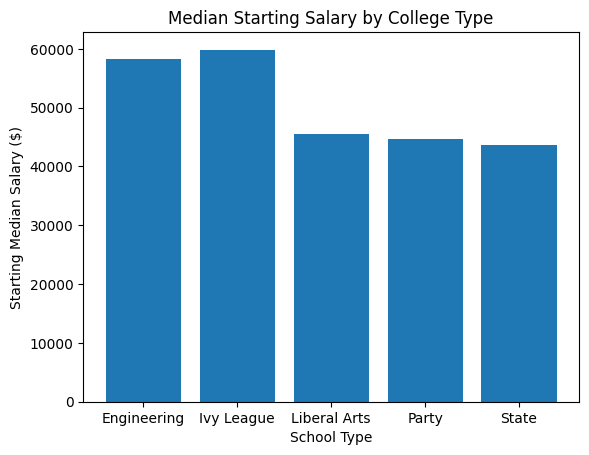

In [22]:
# Group the data by college type and calculate the median starting salary
grouped_salaries = salaries.groupby('School Type')['Starting Median Salary'].median().reset_index()

# Create a bar plot
plt.bar(grouped_salaries['School Type'], grouped_salaries['Starting Median Salary'])
plt.xlabel('School Type')
plt.ylabel('Starting Median Salary ($)')
plt.title('Median Starting Salary by College Type')

plt.show()

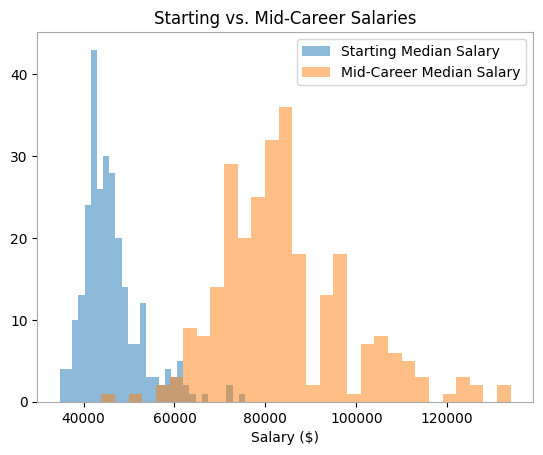

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# generate some random data
data1 = salaries['Starting Median Salary']
data2 = salaries['Mid-Career Median Salary']

# create a figure and axis
fig, ax = plt.subplots()

# plot the histograms with transparency to show overlaps
ax.hist(data1, bins=30, alpha=0.5, label='Starting Median Salary')
ax.hist(data2, bins=30, alpha=0.5, label='Mid-Career Median Salary')

# set labels and title
ax.set_xlabel('Salary ($)')
ax.set_ylabel('')
ax.set_title('Starting vs. Mid-Career Salaries')

# add legend
ax.legend()

# show the plot
plt.show()


# <font color=#1261A0>**Results**</font>


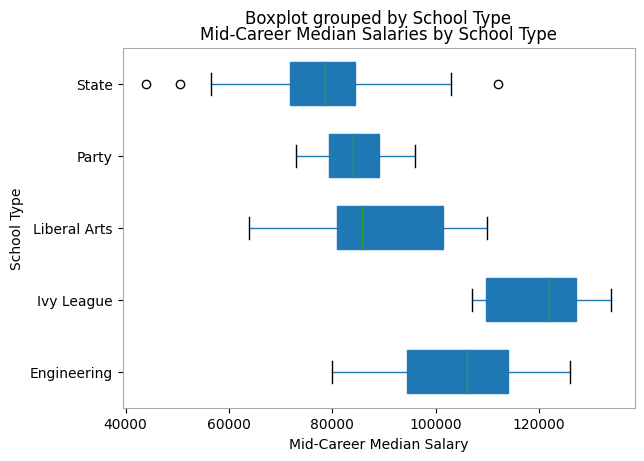

In [106]:
mid_career_salaries = salaries[['School Type', 'Mid-Career Median Salary']]

# create a dictionary to map school types to colors
colors = {'Engineering': 'red', 'Liberal Arts': 'blue', 'Party': 'green', 'State': 'orange', 'Ivy League': 'purple'}

# create the side-by-side boxplot
fig, ax = plt.subplots()
mid_career_salaries.boxplot(by='School Type', ax=ax, vert=False, grid=False, widths=0.6, patch_artist=True)

# customize the plot
for i, box in enumerate(ax.artists):
    box.set_facecolor(colors[list(colors.keys())[i]])

ax.set_xlabel('Mid-Career Median Salary')
ax.set_ylabel('School Type')
ax.set_title('Mid-Career Median Salaries by School Type')

# show the plot
plt.show()


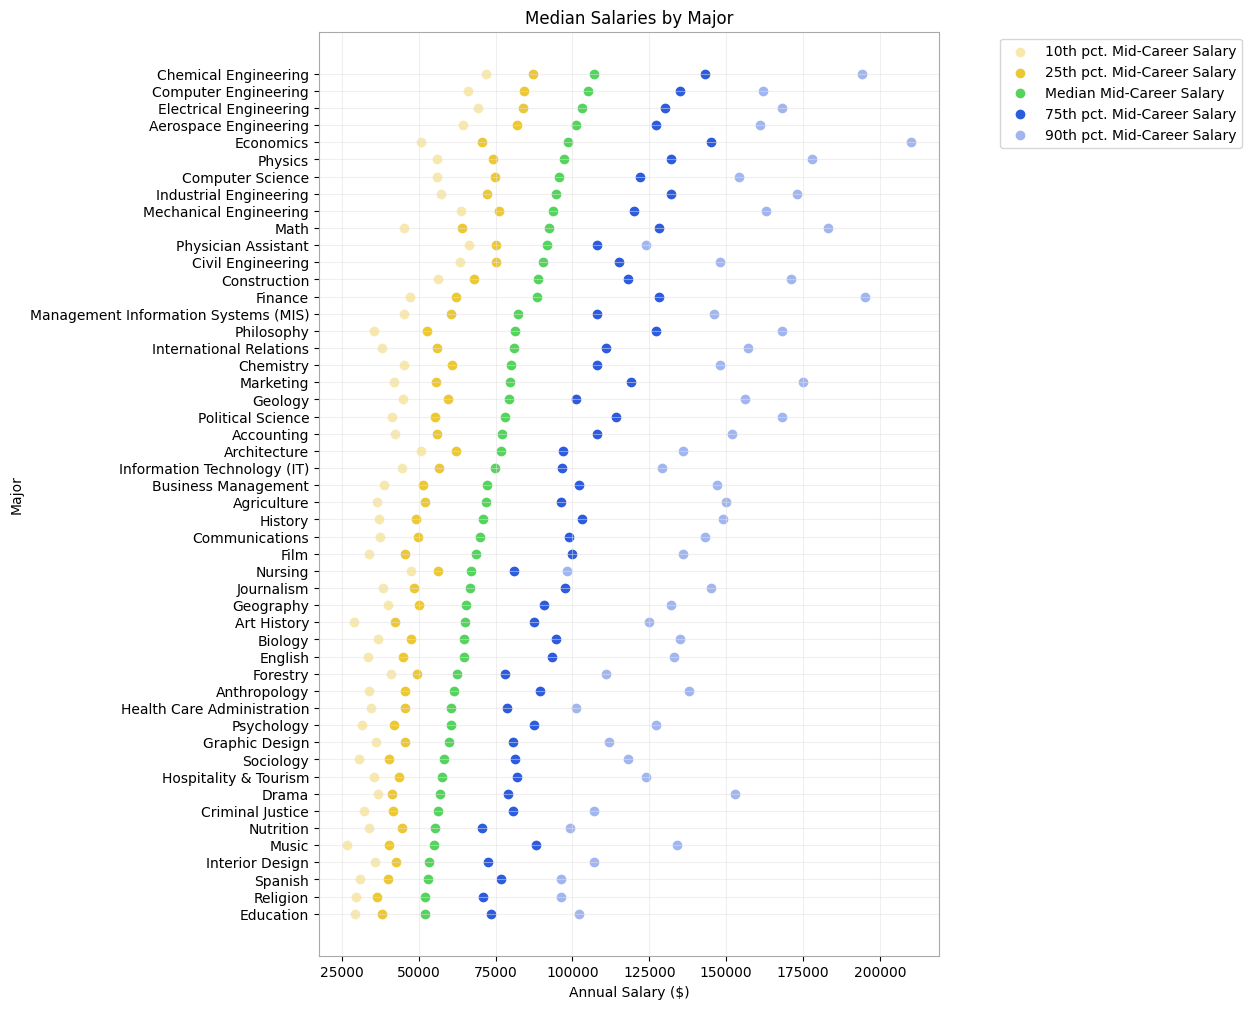

In [78]:
df2 = degrees.reset_index().sort_values(by = 'Mid-Career Median Salary', ascending = True)
df2 = df2.reset_index()

fig = plt.figure(figsize=(8,12))
matplotlib.rc('grid', alpha = .5, color = '#e3dfdf')
matplotlib.rc('axes', edgecolor = 'darkgrey')

x = df2['Starting Median Salary']
y = df2.index
labels = df2['Undergraduate Major']
plt.yticks(y, labels)

x1 = df2['Mid-Career 10th Percentile Salary']
plt.scatter(x1, y, color='#f7e9ad', label = '10th pct. Mid-Career Salary')

x2 = df2['Mid-Career 25th Percentile Salary']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid-Career Salary')

x3 = df2['Mid-Career Median Salary']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid-Career Salary')

x4 = df2['Mid-Career 75th Percentile Salary']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid-Career Salary')

x5 = df2['Mid-Career 90th Percentile Salary']
plt.scatter(x5, y, color='#a1b6f0', label = '90th pct. Mid-Career Salary')

plt.xlabel('Annual Salary ($)')
plt.ylabel('Major')
plt.title('Median Salaries by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

plt.grid(True)

plt.show()

# <font color=#1261A0>**Discussion**</font>
